In [46]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas_profiling as pp
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
# Import the dataset
heart_df = pd.read_excel('heart.xlsx', sheet_name = 'heart')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
# Print basic information of the dataset
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [49]:
# Show the statistical information of the dataset
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [50]:
# Create the dummy variables
df = pd.get_dummies(heart_df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])
# Scale the dataset and updates the columns
scale_columns= ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
df[scale_columns] = StandardScaler().fit_transform(df[scale_columns])

In [51]:
# Create train and test sets
X = df.drop(['output'], axis = 1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [52]:
# Create train and test sets for at home metrics
X_home = df[['age', 'sex_0', 'sex_1', 'trtbps', 'chol', 'fbs_0', 'fbs_1', 'thalachh']]
y_home = df['output']
X_train_home, X_test_home, y_train_home, y_test_home = train_test_split(X_home, y_home, test_size = 0.20, random_state = 0)

In [53]:
# Build a classification report function
def report(classification, X_train, y_train, X_test, y_test, train = True):
    if train:
        prediction = classification.predict(X_train)
        result_report = pd.DataFrame(classification_report(y_train, prediction, output_dict=True))
        cm = confusion_matrix(y_train, prediction)
        FN = cm[0][1]
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): \n{(FN/len(y_train)) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{classification}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {cm}\n")
    else:
        prediction = classification.predict(X_test)
        result_report = pd.DataFrame(classification_report(y_test, prediction, output_dict=True))
        cm = confusion_matrix(y_test, prediction)
        FN = cm[0][1]
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): \n{(FN/len(y_test)) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{classification}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {cm}\n")

# Logistic Regression

In [54]:
# Conduct logistic regression model
logistic = LogisticRegression(solver='liblinear', random_state=0)
logistic.fit(X_train, y_train)
# Print results
report(logistic, X_train, y_train, X_test, y_test, train=True)
report(logistic, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.95%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
8.68%
_______________________________________________
Classification Report:
LogisticRegression(random_state=0, solver='liblinear')
_______________________________________________
Confusion Matrix: 
 [[ 90  21]
 [ 13 118]]

Test Result:
Accuracy Score: 88.52%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
6.56%
_______________________________________________
Classification Report:
LogisticRegression(random_state=0, solver='liblinear')
_______________________________________________
Confusion Matrix: 
 [[23  4]
 [ 3 31]]



In [55]:
parameters = {'C': np.logspace(-10, 10),
            'solver': ['liblinear'],
            'max_iter': np.arange(1000, 2000, 100)}

best_param = GridSearchCV(LogisticRegression(random_state = 0),
                          param_grid=parameters,
                          cv=10,
                          verbose=True)
best_param.fit(X_train, y_train)
best_param.score(X_test, y_test)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


0.8852459016393442

In [56]:
# Conduct logistic regression model
logistic = LogisticRegression(solver='liblinear', random_state=0)
logistic.fit(X_train_home, y_train_home)
# Print results
report(logistic, X_train_home, y_train_home, X_test_home, y_test_home, train=True)
report(logistic, X_train_home, y_train_home, X_test_home, y_test_home, train=False)

Train Result:
Accuracy Score: 72.73%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
16.12%
_______________________________________________
Classification Report:
LogisticRegression(random_state=0, solver='liblinear')
_______________________________________________
Confusion Matrix: 
 [[ 72  39]
 [ 27 104]]

Test Result:
Accuracy Score: 73.77%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
11.48%
_______________________________________________
Classification Report:
LogisticRegression(random_state=0, solver='liblinear')
_______________________________________________
Confusion Matrix: 
 [[20  7]
 [ 9 25]]



# K Nearest Neighbors

In [57]:
# Create an empty array to store the scores
knn_scores = []
# Pick number of k from 1 to 20
for k in range(1,21):
    # Perfrom K neighbors classifier
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier Scores as K Increases')

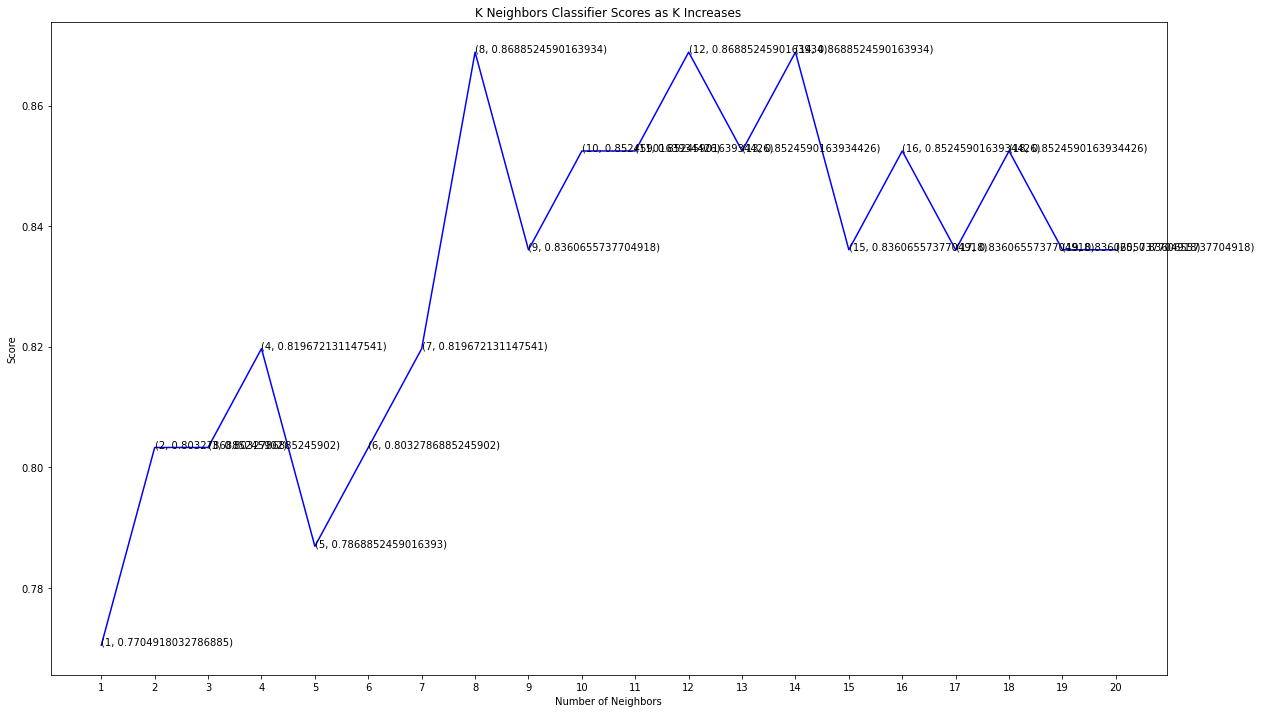

In [58]:
# Make a plot of the scores as k increases
plt.figure(figsize=(20,12))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.title('K Neighbors Classifier Scores as K Increases')

In [59]:
# Conduct K Nearest Neighbors Model
knn_classification = KNeighborsClassifier(n_neighbors=8)
knn_classification.fit(X_train, y_train)
# Print results
report(knn_classification, X_train, y_train, X_test, y_test, train=True)
report(knn_classification, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.36%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
7.44%
_______________________________________________
Classification Report:
KNeighborsClassifier(n_neighbors=8)
_______________________________________________
Confusion Matrix: 
 [[ 93  18]
 [ 15 116]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
6.56%
_______________________________________________
Classification Report:
KNeighborsClassifier(n_neighbors=8)
_______________________________________________
Confusion Matrix: 
 [[23  4]
 [ 4 30]]



In [60]:
parameters = {'n_neighbors': np.arange(2, 15),
            'leaf_size': [10, 15, 20, 25, 30, 35, 40, 45, 50],
            'p':[1,2,3,4,5], 
            'algorithm': ['auto', 'ball_tree', 'kd_tree']}
best_param = GridSearchCV(KNeighborsClassifier(),
                        param_grid=parameters,
                        cv=5,
                        verbose=True)
best_param.fit(X_train, y_train)
best_param.score(X_test, y_test)

Fitting 5 folds for each of 1755 candidates, totalling 8775 fits


0.819672131147541

In [61]:
# Conduct K Nearest Neighbors Model
knn_classification = KNeighborsClassifier(n_neighbors=8)
knn_classification.fit(X_train_home, y_train_home)
# Print results
report(knn_classification, X_train_home, y_train_home, X_test_home, y_test_home, train=True)
report(knn_classification, X_train_home, y_train_home, X_test_home, y_test_home, train=False)

Train Result:
Accuracy Score: 76.45%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
8.26%
_______________________________________________
Classification Report:
KNeighborsClassifier(n_neighbors=8)
_______________________________________________
Confusion Matrix: 
 [[91 20]
 [37 94]]

Test Result:
Accuracy Score: 70.49%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
13.11%
_______________________________________________
Classification Report:
KNeighborsClassifier(n_neighbors=8)
_______________________________________________
Confusion Matrix: 
 [[19  8]
 [10 24]]



# Support Vector Model

In [62]:
support_vector = SVC(kernel='rbf', gamma=0.01, C=1.0)
support_vector.fit(X_train, y_train)

report(support_vector, X_train, y_train, X_test, y_test, train=True)
report(support_vector, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.36%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
8.68%
_______________________________________________
Classification Report:
SVC(gamma=0.01)
_______________________________________________
Confusion Matrix: 
 [[ 90  21]
 [ 12 119]]

Test Result:
Accuracy Score: 88.52%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
4.92%
_______________________________________________
Classification Report:
SVC(gamma=0.01)
_______________________________________________
Confusion Matrix: 
 [[24  3]
 [ 4 30]]



In [63]:
# parameters = {'C': np.logspace(-5, 5, 20),
#             'kernel': ['rbf'],
#             'gamma': [1000, 100, 10, 0.1, 0.01, 0.001, 0.0001, 0.00001]
#            }
# best_param = GridSearchCV(svm.SVC(),
#                         param_grid=parameters,
#                         cv=20,
#                         verbose=True)
# best_param.fit(X_train, y_train)
# best_param.score(X_test, y_test)

In [64]:
support_vector = SVC(kernel='rbf', gamma=0.01, C=1.0, random_state=0)
support_vector.fit(X_train_home, y_train_home)

report(support_vector, X_train_home, y_train_home, X_test_home, y_test_home, train=True)
report(support_vector, X_train_home, y_train_home, X_test_home, y_test_home, train=False)

Train Result:
Accuracy Score: 71.90%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
18.60%
_______________________________________________
Classification Report:
SVC(gamma=0.01, random_state=0)
_______________________________________________
Confusion Matrix: 
 [[ 66  45]
 [ 23 108]]

Test Result:
Accuracy Score: 68.85%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
18.03%
_______________________________________________
Classification Report:
SVC(gamma=0.01, random_state=0)
_______________________________________________
Confusion Matrix: 
 [[16 11]
 [ 8 26]]



# Decision Tree

In [65]:
# Create an empty array to store the decision tree scores
dt_scores = []
# Perfrom decision tree classification
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier Scores as Number of Maximum Features')

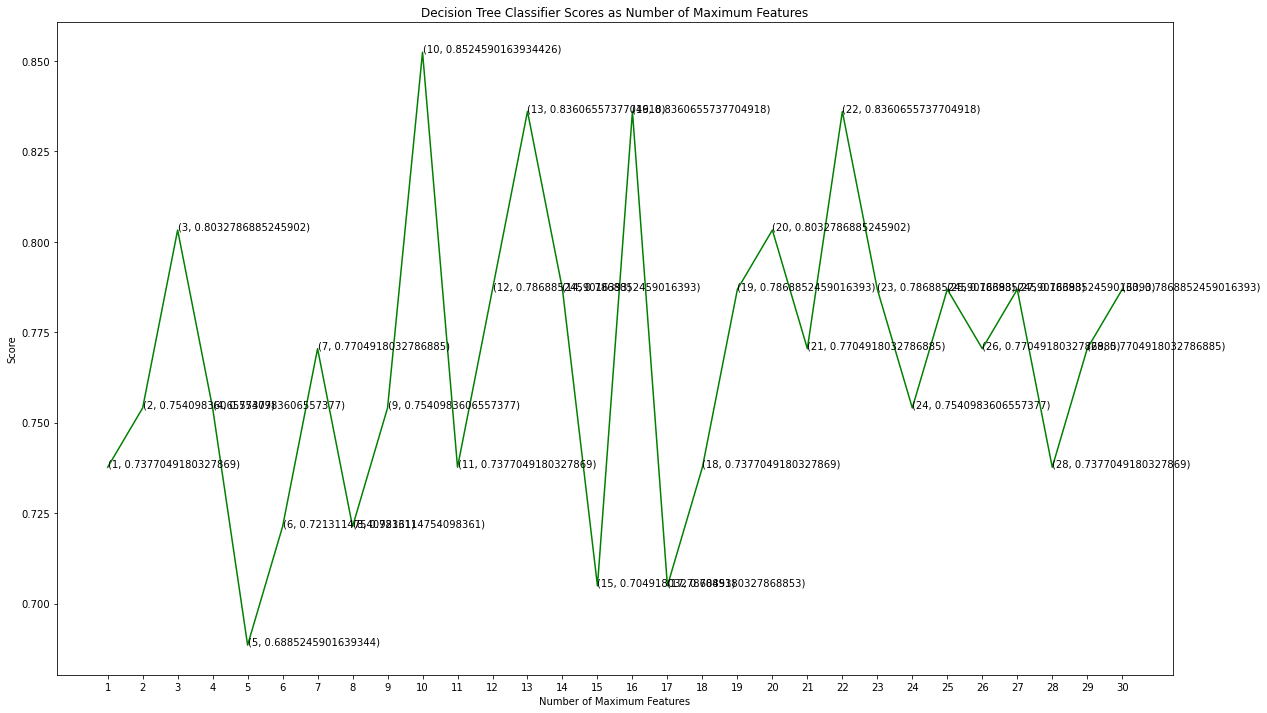

In [66]:
# Make a plot that shows the decision tree classifier scores as number of maximum features increases
plt.figure(figsize=(20,12))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Number of Maximum Features')
plt.ylabel('Score')
plt.title('Decision Tree Classifier Scores as Number of Maximum Features')

In [67]:
decision_tree = DecisionTreeClassifier(max_features=10, random_state = 0)
decision_tree.fit(X_train, y_train)

report(decision_tree, X_train, y_train, X_test, y_test, train=True)
report(decision_tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
0.00%
_______________________________________________
Classification Report:
DecisionTreeClassifier(max_features=10, random_state=0)
_______________________________________________
Confusion Matrix: 
 [[111   0]
 [  0 131]]

Test Result:
Accuracy Score: 85.25%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
4.92%
_______________________________________________
Classification Report:
DecisionTreeClassifier(max_features=10, random_state=0)
_______________________________________________
Confusion Matrix: 
 [[24  3]
 [ 6 28]]



In [68]:
decision_tree = DecisionTreeClassifier(max_features=10, random_state = 0)
decision_tree.fit(X_train_home, y_train_home)

report(decision_tree, X_train_home, y_train_home, X_test_home, y_test_home, train=True)
report(decision_tree, X_train_home, y_train_home, X_test_home, y_test_home, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
0.00%
_______________________________________________
Classification Report:
DecisionTreeClassifier(max_features=10, random_state=0)
_______________________________________________
Confusion Matrix: 
 [[111   0]
 [  0 131]]

Test Result:
Accuracy Score: 70.49%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
19.67%
_______________________________________________
Classification Report:
DecisionTreeClassifier(max_features=10, random_state=0)
_______________________________________________
Confusion Matrix: 
 [[15 12]
 [ 6 28]]



# Random Forest

In [69]:
random_forest = RandomForestClassifier(n_estimators=1000, random_state = 0)
random_forest.fit(X_train, y_train)
report(random_forest, X_train, y_train, X_test, y_test, train=True)
report(random_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
0.00%
_______________________________________________
Classification Report:
RandomForestClassifier(n_estimators=1000, random_state=0)
_______________________________________________
Confusion Matrix: 
 [[111   0]
 [  0 131]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
6.56%
_______________________________________________
Classification Report:
RandomForestClassifier(n_estimators=1000, random_state=0)
_______________________________________________
Confusion Matrix: 
 [[23  4]
 [ 4 30]]



In [70]:
random_forest = RandomForestClassifier(n_estimators=1000, random_state = 0)
random_forest.fit(X_train_home, y_train_home)
report(random_forest, X_train_home, y_train_home, X_test_home, y_test_home, train=True)
report(random_forest, X_train_home, y_train_home, X_test_home, y_test_home, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
0.00%
_______________________________________________
Classification Report:
RandomForestClassifier(n_estimators=1000, random_state=0)
_______________________________________________
Confusion Matrix: 
 [[111   0]
 [  0 131]]

Test Result:
Accuracy Score: 72.13%
_______________________________________________
False Negative Percentage(The patients predicted to have no heart disease but does have heart disease): 
11.48%
_______________________________________________
Classification Report:
RandomForestClassifier(n_estimators=1000, random_state=0)
_______________________________________________
Confusion Matrix: 
 [[20  7]
 [10 24]]

